In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import nltk
import warnings
warnings.filterwarnings('ignore')


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#reading the dataset
df = pd.read_csv('/content/WELFake_Dataset.csv')

In [4]:
df.shape

(72134, 4)

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
# dropping irrelevant columns
df.drop(columns=['Unnamed: 0'], axis = 1 ,inplace = True)

In [7]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [8]:
df.isnull().sum()

,0
title,558
text,39
label,0


In [9]:
# replacing missing values with spaces
df.fillna(' ', inplace = True)

In [10]:
df.isnull().sum()

,0
title,0
text,0
label,0


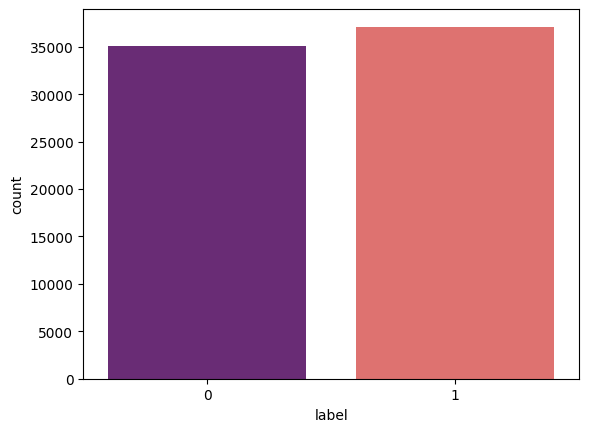

In [11]:
sns.countplot(x = 'label', data = df,palette = 'magma')
plt.show()

In [12]:
portStemmer=PorterStemmer()

In [13]:
def stemming(content):
    content = str(content)
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [portStemmer.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
# stemming the title column
df['title']=df['title'].apply(stemming)

In [15]:
df['title'].head(5)

,title
0,law enforc high alert follow threat cop white ...
1,
2,unbeliev obama attorney gener say charlott rio...
3,bobbi jindal rais hindu use stori christian co...
4,satan russia unv imag terrifi new supernuk wes...


In [16]:
df.drop(columns=('text'),inplace=True)

In [17]:
df.head()

,title,label
0,law enforc high alert follow threat cop white ...,1
1,,1
2,unbeliev obama attorney gener say charlott rio...,1
3,bobbi jindal rais hindu use stori christian co...,0
4,satan russia unv imag terrifi new supernuk wes...,1


In [18]:
# Segregating feature and Target
X=df['title'].values
y=df['label'].values

In [19]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [20]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 629110 stored elements and shape (72134, 19639)>
  Coords	Values
  (0, 407)	0.3190180925014663
  (0, 1802)	0.33473541566384035
  (0, 3679)	0.24871262252022117
  (0, 5509)	0.31820565801047196
  (0, 6425)	0.28932771754845743
  (0, 6730)	0.48553136502134386
  (0, 7887)	0.26746434949988324
  (0, 9699)	0.22829788917209384
  (0, 17260)	0.24871262252022117
  (0, 17363)	0.2542650376115143
  (0, 18648)	0.1297506867782943
  (0, 19106)	0.19134939529376566
  (2, 1049)	0.28404017886581956
  (2, 2673)	0.30809679188606154
  (2, 2919)	0.3639616996972358
  (2, 6880)	0.2652283770602196
  (2, 8020)	0.2692285294185893
  (2, 11864)	0.2231406266784195
  (2, 12011)	0.16878852994653004
  (2, 12744)	0.27904818164471595
  (2, 13591)	0.22687620695463123
  (2, 14591)	0.3580030298678158
  (2, 15094)	0.1609967301122813
  (2, 16446)	0.1999703023632961
  (2, 18034)	0.35962437110547785
  :	:
  (72130, 17778)	0.13227219506940732
  (72130, 18936)	0.2530249939

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

MultinomialNB: 87.14


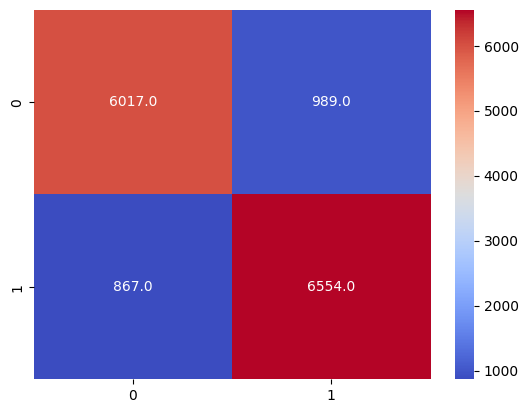

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      7006
           1       0.87      0.88      0.88      7421

    accuracy                           0.87     14427
   macro avg       0.87      0.87      0.87     14427
weighted avg       0.87      0.87      0.87     14427

Saved pipeline for MultinomialNB to MultinomialNB_pipeline.pkl
------------------------------
LogisticRegression: 89.53


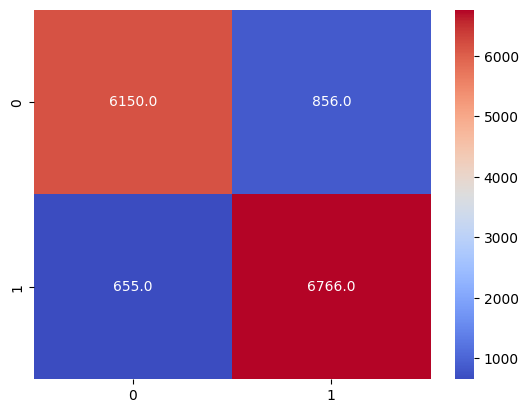

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7006
           1       0.89      0.91      0.90      7421

    accuracy                           0.90     14427
   macro avg       0.90      0.89      0.90     14427
weighted avg       0.90      0.90      0.90     14427

Saved pipeline for LogisticRegression to LogisticRegression_pipeline.pkl
------------------------------
DecisionTreeClassifier: 86.65


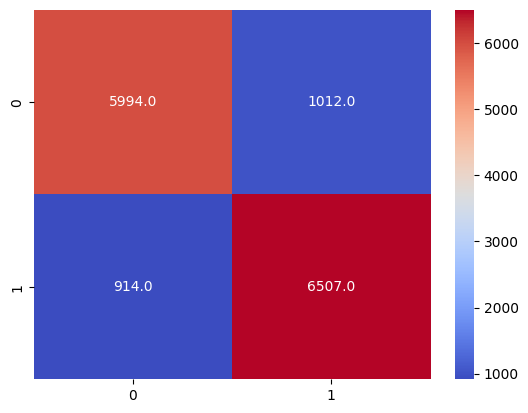

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7006
           1       0.87      0.88      0.87      7421

    accuracy                           0.87     14427
   macro avg       0.87      0.87      0.87     14427
weighted avg       0.87      0.87      0.87     14427

Saved pipeline for DecisionTreeClassifier to DecisionTreeClassifier_pipeline.pkl
------------------------------
RandomForestClassifier: 90.44


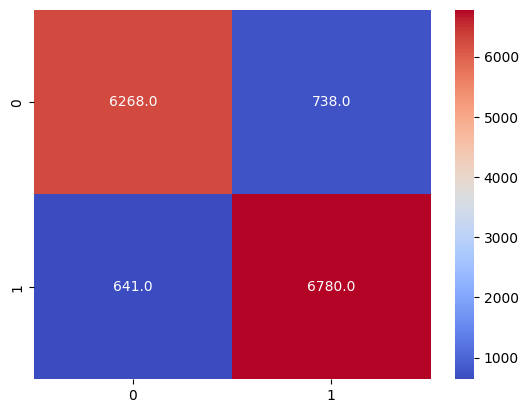

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7006
           1       0.90      0.91      0.91      7421

    accuracy                           0.90     14427
   macro avg       0.90      0.90      0.90     14427
weighted avg       0.90      0.90      0.90     14427

Saved pipeline for RandomForestClassifier to RandomForestClassifier_pipeline.pkl
------------------------------


In [22]:
models = [
    MultinomialNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_pred,y_test)
    print(f"{model.__class__.__name__}: {accuracy*100:.2f}")
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'coolwarm',fmt = '.1f')
    plt.show()
    print(classification_report(y_test,y_pred))
    # Save the model with preprocessing steps in a pipeline
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),  # Preprocessing step
        ('classifier', model)  # Classification model
    ])

    pipeline.fit(df['title'], y)  # Fit pipeline on full data

    # Save pipeline
    model_filename = f"{model.__class__.__name__}_pipeline.pkl"
    joblib.dump(pipeline, model_filename)
    print(f"Saved pipeline for {model.__class__.__name__} to {model_filename}")
    print("-" * 30)


In [34]:
import joblib

# Input text to test
f = '''
A flat earth was once a commonly held belief, it persisted in some areas until the middle ages. Definitive proof of a spherical earth did not come until  Ferdinand Magellan successfully traveled around the earth (1519-1521). However this belief was challenged much earlier thanks to major advancements in ancient Greek astronomy.

The image depicts a man crawling under the edge of the sky, as if it were a solid hemisphere. This image first appeared in Camille Flammarion's L'atmosphère: météorologie populaire (1888) Image Credit: Heikenwaelder Hug
Plato (427–347 BC) was convinced that the earth was spherical: "My conviction is that the earth is a round body in the centre of the heavens...Also I believe the Earth is very vast". Significantly, he could not prove this was the case. It was his prized student Aristotle who began offering evidence for a spherical earth. One of his more convincing pieces of evidence was the shape of the earth’s shadow visible during a Lunar Eclipse. Notice the subtle curvature of the shadow cast on the moon:

Another way to prove the earth is spherical came from Eratosthenes (276–194 BC). His method involves looking at the shadows cast by the sun on the surface of the earth. This is the basis for a sundial:'''

f_stem=stemming(f)

In [35]:
best_model = joblib.load("/content/LogisticRegression_pipeline.pkl")

In [36]:
def pred(p):
    if (p==0):
        print('The news is fake')
    else:
        print('The news is real')

pred(best_model.predict([f_stem])[0])

The news is real


In [30]:
#Direct testing through saved model pipe line

import joblib

# Input text to test
f = '''Australia bans social media for children under 16, first country to do so
The law forces tech giants from Instagram and Facebook owner Meta to TikTok to stop minors logging in or face fines of up to A$49.5 million (USD32 million).'''

f=stemming(f)

# Load the desired pipeline
pipeline_filename = "LogisticRegression_pipeline.pkl"  # Replace with the model name you want to use
pipeline = joblib.load(pipeline_filename)

# Predict the label for the new text
prediction = pipeline.predict([f])[0]
label = "Real" if prediction == 1 else "Fake"

# Print the results
print(f"Prediction for the given news: {label}")


Prediction for the given news: Real
